In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, GRU, Conv1D, MaxPooling1D, Flatten, Dropout

Load your dataset

In [30]:
data = pd.read_csv("2w.csv")

Features and Target variables

In [31]:
features = data[['CF(PCU/min)','CF*2(PCU/min)','%_of_4W','%_of_4W*2']].values

# For 3W Uncomment the below line
# features = data[['CF(PCU/min)','CF*2(PCU/min)','%_of_4W','%_of_4W*2','Bus','HCV','LCV','Total']].values

# For HV and LCV
# features = data[['CF(PCU/min)','CF*2(PCU/min)','%_of_2W','%_of_3W','%_of_4W']].values

target = data['SD'].values

Normalize data

In [32]:
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

Split data into train and test sets

In [33]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

Reshape the input data for all models

In [34]:
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

Define, Create and Evaluate Model

In [35]:
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True))
    # model.add(Dropout(0.2))
    model.add(LSTM(48, activation='relu', return_sequences=False))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

lstm_model = create_lstm_model()
lstm_model.fit(X_train_lstm, y_train, epochs=800, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_lstm = lstm_model.predict(X_test_lstm)
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(y_test, y_pred_lstm)

Epoch 1/800
31/31 [==============================] - 1s 10ms/step - loss: 282.3456 - val_loss: 262.5750
Epoch 2/800
31/31 [==============================] - 0s 4ms/step - loss: 102.6045 - val_loss: 33.7988
Epoch 3/800
31/31 [==============================] - 0s 3ms/step - loss: 28.8175 - val_loss: 27.1091
Epoch 4/800
31/31 [==============================] - 0s 3ms/step - loss: 28.5626 - val_loss: 29.2239
Epoch 5/800
31/31 [==============================] - 0s 3ms/step - loss: 27.9412 - val_loss: 27.3083
Epoch 6/800
31/31 [==============================] - 0s 3ms/step - loss: 27.5494 - val_loss: 31.4481
Epoch 7/800
31/31 [==============================] - 0s 4ms/step - loss: 27.9047 - val_loss: 29.1024
Epoch 8/800
31/31 [==============================] - 0s 5ms/step - loss: 28.9453 - val_loss: 27.4144
Epoch 9/800
31/31 [==============================] - 0s 3ms/step - loss: 32.2072 - val_loss: 28.4803
Epoch 10/800
31/31 [==============================] - 0s 4ms/step - loss: 27.1693 - val

Visualize LSTM results

0.7075640822023739


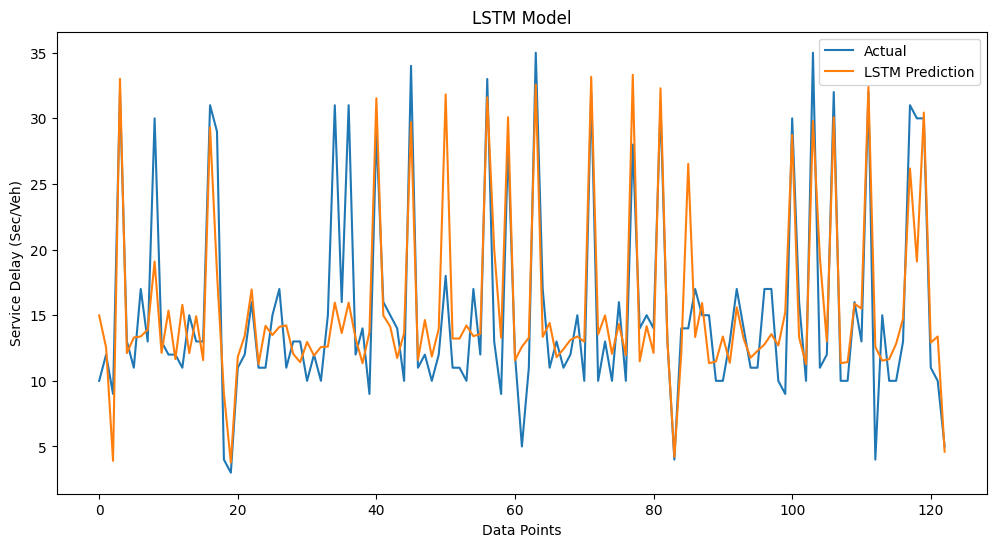

In [36]:
print(r2_lstm)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_lstm, label='LSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('LSTM Model')
plt.show()

In [37]:
def create_bilstm_model():
    model = Sequential()
    model.add(Bidirectional(LSTM(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True)))
    model.add(Bidirectional(LSTM(64, activation='relu', return_sequences=False)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

bilstm_model = create_bilstm_model()
bilstm_model.fit(X_train_lstm, y_train, epochs=800, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_bilstm = bilstm_model.predict(X_test_lstm)
mae_bilstm = mean_absolute_error(y_test, y_pred_bilstm)
mse_bilstm = mean_squared_error(y_test, y_pred_bilstm)
rmse_bilstm=np.sqrt(mse_bilstm)
r2_bilstm = r2_score(y_test, y_pred_bilstm)


Epoch 1/800
31/31 [==============================] - 3s 16ms/step - loss: 266.8579 - val_loss: 154.5502
Epoch 2/800
31/31 [==============================] - 0s 6ms/step - loss: 44.8493 - val_loss: 23.7195
Epoch 3/800
31/31 [==============================] - 0s 5ms/step - loss: 24.4617 - val_loss: 24.6026
Epoch 4/800
31/31 [==============================] - 0s 4ms/step - loss: 23.9763 - val_loss: 23.0864
Epoch 5/800
31/31 [==============================] - 0s 5ms/step - loss: 24.1260 - val_loss: 22.3266
Epoch 6/800
31/31 [==============================] - 0s 5ms/step - loss: 23.7451 - val_loss: 21.9323
Epoch 7/800
31/31 [==============================] - 0s 4ms/step - loss: 23.2974 - val_loss: 21.8147
Epoch 8/800
31/31 [==============================] - 0s 5ms/step - loss: 23.7612 - val_loss: 21.5825
Epoch 9/800
31/31 [==============================] - 0s 5ms/step - loss: 23.6572 - val_loss: 22.0883
Epoch 10/800
31/31 [==============================] - 0s 5ms/step - loss: 23.7303 - val_

Visualize BiLSTM results

0.7609178248950619


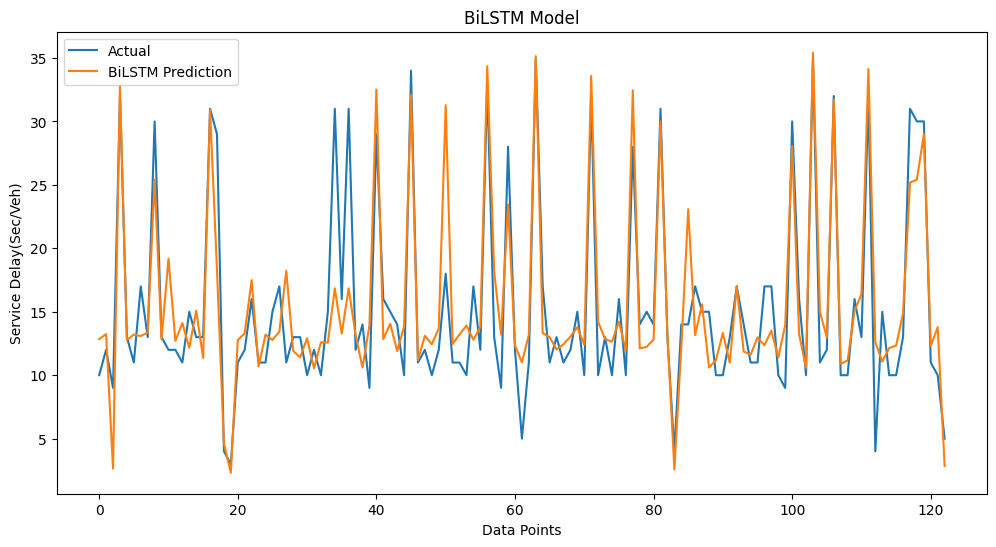

In [38]:
print(r2_bilstm)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_bilstm, label='BiLSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay(Sec/Veh)')
plt.legend()
plt.title('BiLSTM Model')
plt.show()

In [39]:
def create_gru_model():
    model = Sequential()
    model.add(GRU(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True))
    model.add(GRU(48, activation='relu', return_sequences=False))  
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

gru_model = create_gru_model()
gru_model.fit(X_train_lstm, y_train, epochs=700, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_gru = gru_model.predict(X_test_lstm)
mae_gru = mean_absolute_error(y_test, y_pred_gru)
mse_gru = mean_squared_error(y_test, y_pred_gru)
rmse_gru=np.sqrt(mse_gru)
r2_gru = r2_score(y_test, y_pred_gru)

Epoch 1/700
31/31 [==============================] - 1s 10ms/step - loss: 275.0729 - val_loss: 237.6813
Epoch 2/700
31/31 [==============================] - 0s 4ms/step - loss: 86.5230 - val_loss: 38.7275
Epoch 3/700
31/31 [==============================] - 0s 3ms/step - loss: 29.2617 - val_loss: 27.8834
Epoch 4/700
31/31 [==============================] - 0s 3ms/step - loss: 27.0617 - val_loss: 27.0414
Epoch 5/700
31/31 [==============================] - 0s 3ms/step - loss: 26.3709 - val_loss: 26.6895
Epoch 6/700
31/31 [==============================] - 0s 3ms/step - loss: 26.4027 - val_loss: 26.8899
Epoch 7/700
31/31 [==============================] - 0s 3ms/step - loss: 25.6063 - val_loss: 25.6892
Epoch 8/700
31/31 [==============================] - 0s 3ms/step - loss: 25.7174 - val_loss: 26.8532
Epoch 9/700
31/31 [==============================] - 0s 3ms/step - loss: 27.2147 - val_loss: 25.2405
Epoch 10/700
31/31 [==============================] - 0s 3ms/step - loss: 25.0524 - val_

Visualize GRU results

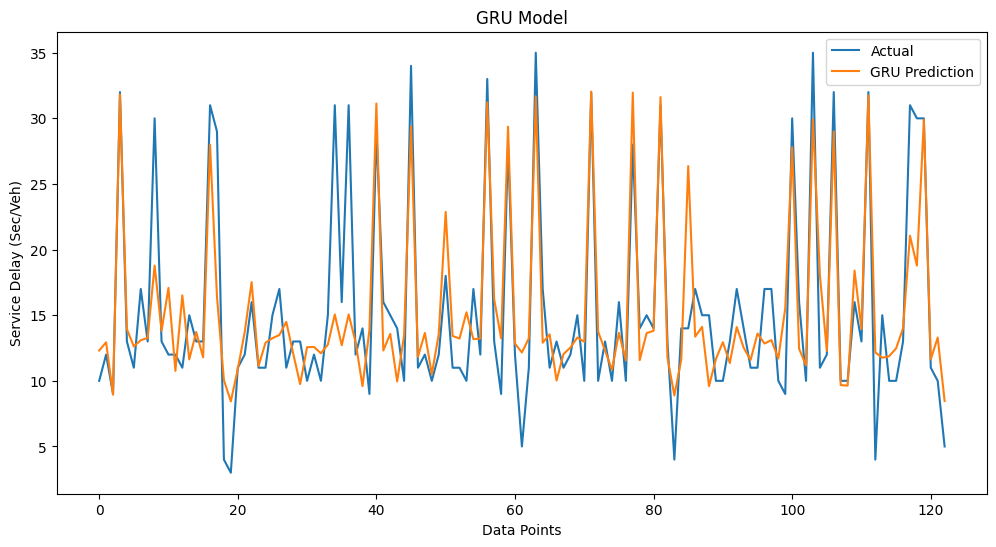

In [40]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_gru, label='GRU Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('GRU Model')
plt.show()

In [41]:
def create_bigru_model():
    model = Sequential()
    model.add(Bidirectional(GRU(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True)))
    model.add(Bidirectional(GRU(48, activation='relu', return_sequences=False))) 
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

bigru_model = create_bigru_model()
bigru_model.fit(X_train_lstm, y_train, epochs=800, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_bigru = bigru_model.predict(X_test_lstm)
mae_bigru = mean_absolute_error(y_test, y_pred_bigru)
mse_bigru = mean_squared_error(y_test, y_pred_bigru)
rmse_bigru=np.sqrt(mse_bigru)
r2_bigru = r2_score(y_test, y_pred_bigru)

Epoch 1/800
31/31 [==============================] - 3s 15ms/step - loss: 252.7699 - val_loss: 152.8293
Epoch 2/800
31/31 [==============================] - 0s 4ms/step - loss: 46.1893 - val_loss: 25.6052
Epoch 3/800
31/31 [==============================] - 0s 5ms/step - loss: 24.5955 - val_loss: 23.6133
Epoch 4/800
31/31 [==============================] - 0s 5ms/step - loss: 24.6506 - val_loss: 24.0063
Epoch 5/800
31/31 [==============================] - 0s 4ms/step - loss: 23.3118 - val_loss: 22.0460
Epoch 6/800
31/31 [==============================] - 0s 4ms/step - loss: 24.3695 - val_loss: 22.7772
Epoch 7/800
31/31 [==============================] - 0s 5ms/step - loss: 23.3074 - val_loss: 22.3030
Epoch 8/800
31/31 [==============================] - 0s 5ms/step - loss: 24.4535 - val_loss: 22.1468
Epoch 9/800
31/31 [==============================] - 0s 4ms/step - loss: 23.4767 - val_loss: 23.4981
Epoch 10/800
31/31 [==============================] - 0s 5ms/step - loss: 24.0685 - val_

Visualize BiGRU results

0.7635974720691461


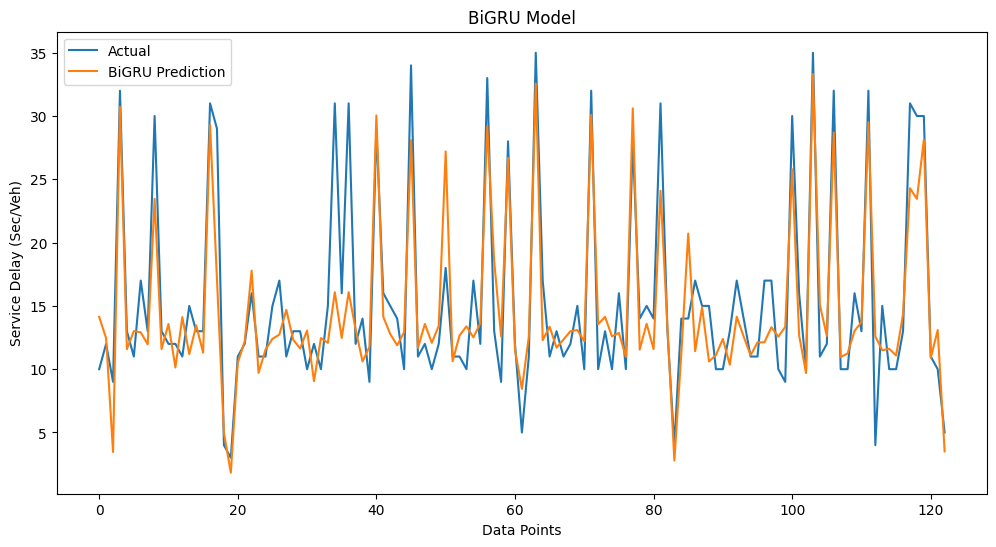

In [42]:
print(r2_bigru)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_bigru, label='BiGRU Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('BiGRU Model')
plt.show()

In [43]:
def create_cnn_model():
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

cnn_model = create_cnn_model()
cnn_model.fit(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), y_train, epochs=800, batch_size=16, validation_data=(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)), y_test), verbose=1)

y_pred_cnn = cnn_model.predict(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)))
mae_cnn = mean_absolute_error(y_test, y_pred_cnn)
mse_cnn = mean_squared_error(y_test, y_pred_cnn)
rmse_cnn=np.sqrt(mse_cnn)
r2_cnn = r2_score(y_test, y_pred_cnn)

Epoch 1/800
31/31 [==============================] - 0s 4ms/step - loss: 256.2455 - val_loss: 212.1623
Epoch 2/800
31/31 [==============================] - 0s 2ms/step - loss: 130.1232 - val_loss: 47.9686
Epoch 3/800
31/31 [==============================] - 0s 2ms/step - loss: 29.5614 - val_loss: 24.9192
Epoch 4/800
31/31 [==============================] - 0s 2ms/step - loss: 24.4682 - val_loss: 25.2009
Epoch 5/800
31/31 [==============================] - 0s 2ms/step - loss: 25.2170 - val_loss: 24.1775
Epoch 6/800
31/31 [==============================] - 0s 2ms/step - loss: 24.4112 - val_loss: 24.1071
Epoch 7/800
31/31 [==============================] - 0s 2ms/step - loss: 24.3059 - val_loss: 23.8393
Epoch 8/800
31/31 [==============================] - 0s 2ms/step - loss: 24.2510 - val_loss: 23.7659
Epoch 9/800
31/31 [==============================] - 0s 2ms/step - loss: 24.4828 - val_loss: 23.5455
Epoch 10/800
31/31 [==============================] - 0s 2ms/step - loss: 24.1021 - val_

Visualize CNN results

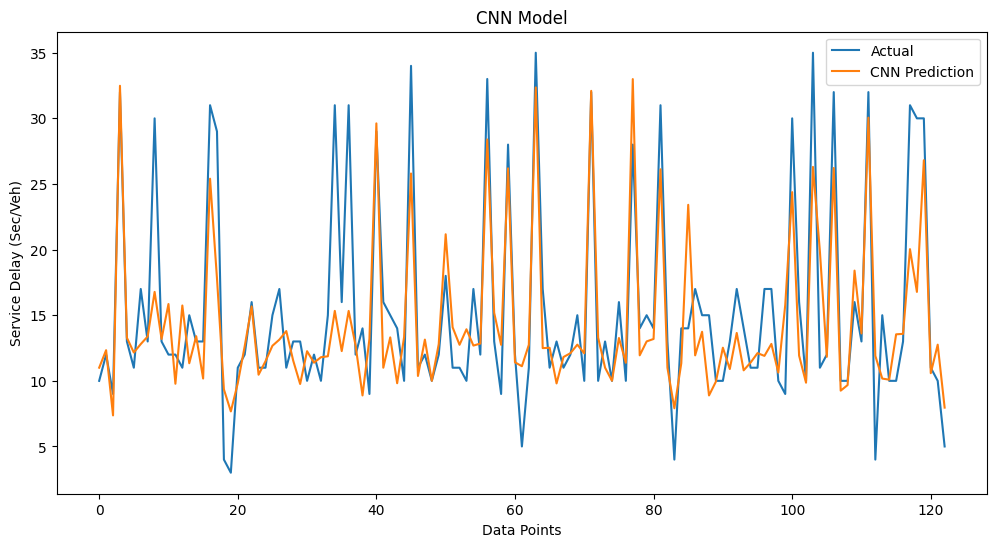

In [44]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_cnn, label='CNN Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('CNN Model')
plt.show()

In [45]:
def create_cnn_lstm_model():
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train_lstm.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

cnn_lstm_model = create_cnn_lstm_model()
cnn_lstm_model.fit(X_train_lstm, y_train, epochs=800, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_cnn_lstm = cnn_lstm_model.predict(X_test_lstm)
mae_cnn_lstm = mean_absolute_error(y_test, y_pred_cnn_lstm)
mse_cnn_lstm = mean_squared_error(y_test, y_pred_cnn_lstm)
rmse_cnn_lstm=np.sqrt(mse_cnn_lstm)
r2_cnn_lstm = r2_score(y_test, y_pred_cnn_lstm)

Epoch 1/800
31/31 [==============================] - 1s 7ms/step - loss: 275.7876 - val_loss: 242.4848
Epoch 2/800
31/31 [==============================] - 0s 3ms/step - loss: 99.1876 - val_loss: 32.2680
Epoch 3/800
31/31 [==============================] - 0s 3ms/step - loss: 35.4081 - val_loss: 25.8050
Epoch 4/800
31/31 [==============================] - 0s 3ms/step - loss: 27.8170 - val_loss: 24.7037
Epoch 5/800
31/31 [==============================] - 0s 3ms/step - loss: 26.2948 - val_loss: 24.0603
Epoch 6/800
31/31 [==============================] - 0s 3ms/step - loss: 25.8164 - val_loss: 24.3497
Epoch 7/800
31/31 [==============================] - 0s 3ms/step - loss: 25.0859 - val_loss: 23.6407
Epoch 8/800
31/31 [==============================] - 0s 3ms/step - loss: 24.5788 - val_loss: 23.0566
Epoch 9/800
31/31 [==============================] - 0s 3ms/step - loss: 24.1779 - val_loss: 22.8471
Epoch 10/800
31/31 [==============================] - 0s 3ms/step - loss: 23.9120 - val_l

Visualize CNN_LSTM results

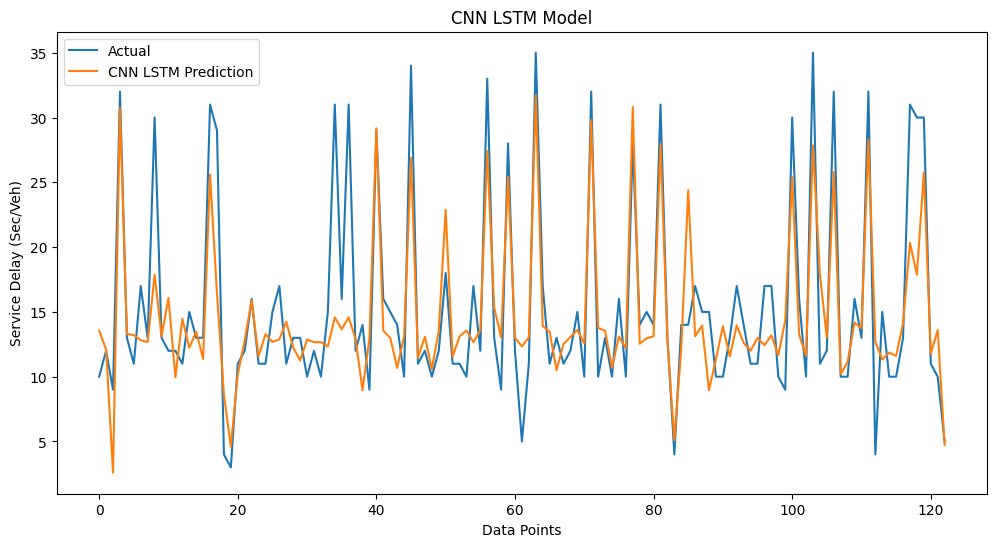

In [46]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_cnn_lstm, label='CNN LSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('CNN LSTM Model')
plt.show()

In [57]:
def create_cnn_bilstm_model():
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train_lstm.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Bidirectional(LSTM(50, activation='relu')))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

cnn_bilstm_model = create_cnn_bilstm_model()
cnn_bilstm_model.fit(X_train_lstm, y_train, epochs=800, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_cnn_bilstm = cnn_bilstm_model.predict(X_test_lstm)
mae_cnn_bilstm = mean_absolute_error(y_test, y_pred_cnn_bilstm)
mse_cnn_bilstm = mean_squared_error(y_test, y_pred_cnn_bilstm)
rmse_cnn_bilstm=np.sqrt(mse_cnn_bilstm)
r2_cnn_bilstm = r2_score(y_test, y_pred_cnn_bilstm)

Epoch 1/800
31/31 [==============================] - 2s 9ms/step - loss: 275.4163 - val_loss: 244.8406
Epoch 2/800
31/31 [==============================] - 0s 3ms/step - loss: 110.8281 - val_loss: 28.2997
Epoch 3/800
31/31 [==============================] - 0s 3ms/step - loss: 29.9143 - val_loss: 30.7898
Epoch 4/800
31/31 [==============================] - 0s 3ms/step - loss: 26.3902 - val_loss: 24.0732
Epoch 5/800
31/31 [==============================] - 0s 3ms/step - loss: 24.2499 - val_loss: 22.1710
Epoch 6/800
31/31 [==============================] - 0s 4ms/step - loss: 23.4234 - val_loss: 21.7823
Epoch 7/800
31/31 [==============================] - 0s 3ms/step - loss: 23.4263 - val_loss: 22.1105
Epoch 8/800
31/31 [==============================] - 0s 3ms/step - loss: 24.7685 - val_loss: 22.7222
Epoch 9/800
31/31 [==============================] - 0s 3ms/step - loss: 22.9947 - val_loss: 23.2542
Epoch 10/800
31/31 [==============================] - 0s 4ms/step - loss: 23.0516 - val_

Visualize CNN_BiLSTM results

0.7220821592333775


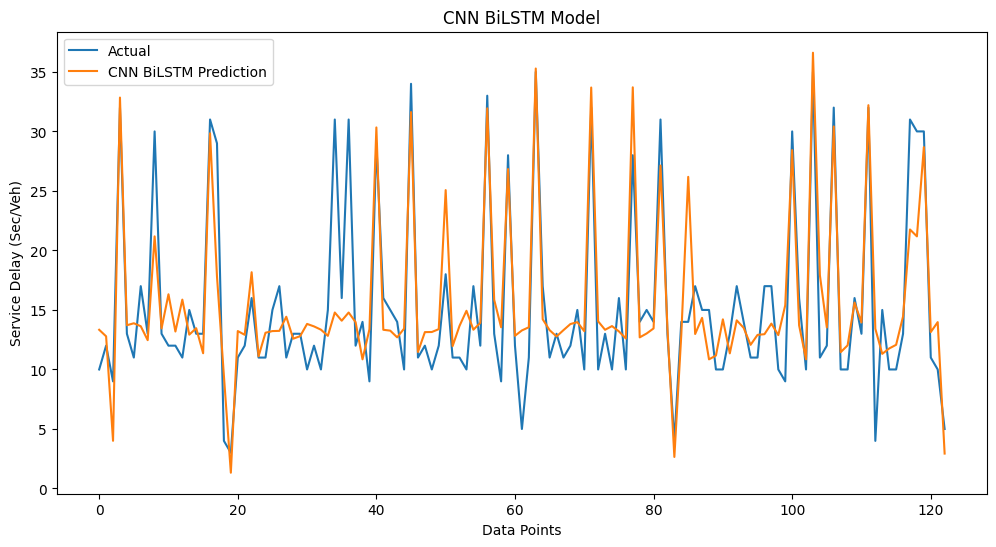

In [58]:
print(r2_cnn_bilstm)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_cnn_bilstm, label='CNN BiLSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('CNN BiLSTM Model')
plt.show()

Visualize metrics

In [59]:
models = ['LSTM', 'BiLSTM', 'GRU', 'BiGRU', 'CNN', 'CNNLSTM', 'CNN Bilstm']
mae_values = [mae_lstm, mae_bilstm, mae_gru, mae_bigru, mae_cnn, mae_cnn_lstm, mae_cnn_bilstm]
mse_values = [rmse_lstm, rmse_bilstm, rmse_gru, rmse_bigru, rmse_cnn, rmse_cnn_lstm, rmse_cnn_bilstm]
r2_values = [r2_lstm, r2_bilstm, r2_gru, r2_bigru, r2_cnn, r2_cnn_lstm, r2_cnn_bilstm]

Plot MAE

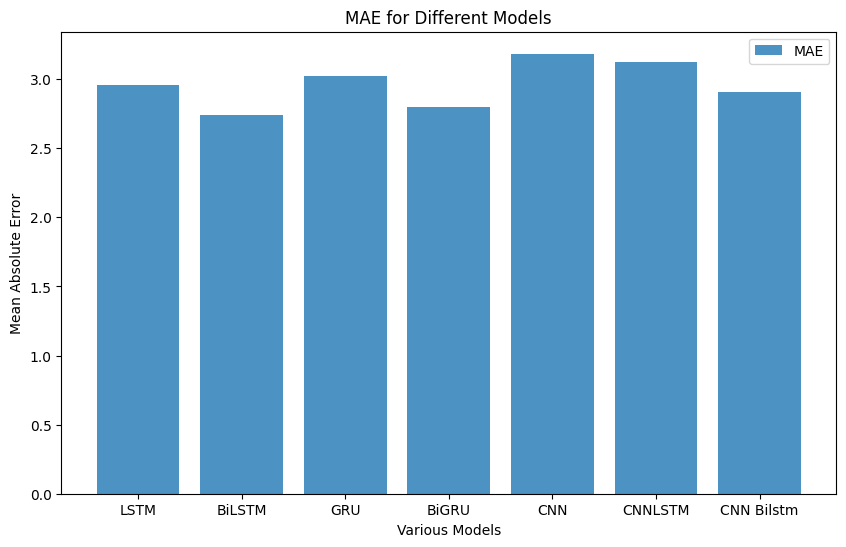

In [60]:
plt.figure(figsize=(10, 6))
plt.bar(models, mae_values, alpha=0.8, label='MAE')
plt.title('MAE for Different Models')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Various Models')
plt.legend()
plt.show()

Plot MSE

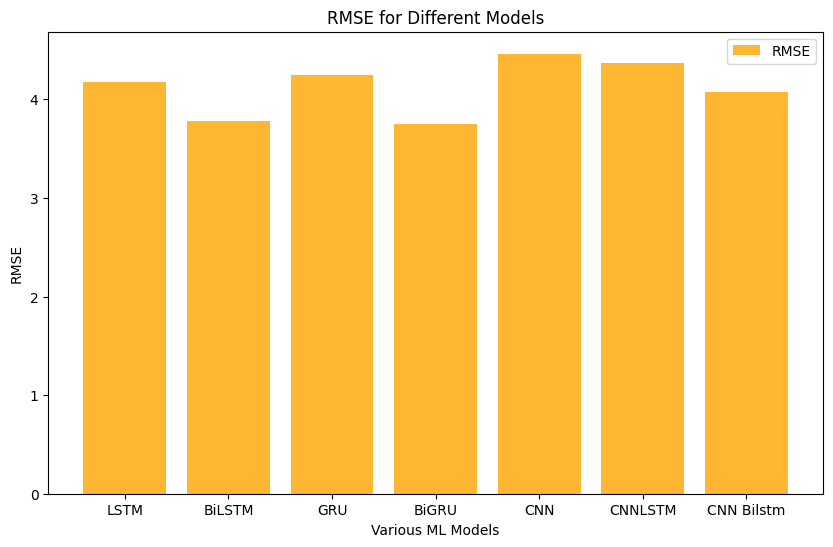

In [61]:
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, alpha=0.8, label='RMSE', color='orange')
plt.title('RMSE for Different Models')
plt.ylabel('RMSE')
plt.xlabel('Various ML Models')
plt.legend()
plt.show()

Plot R2 Score

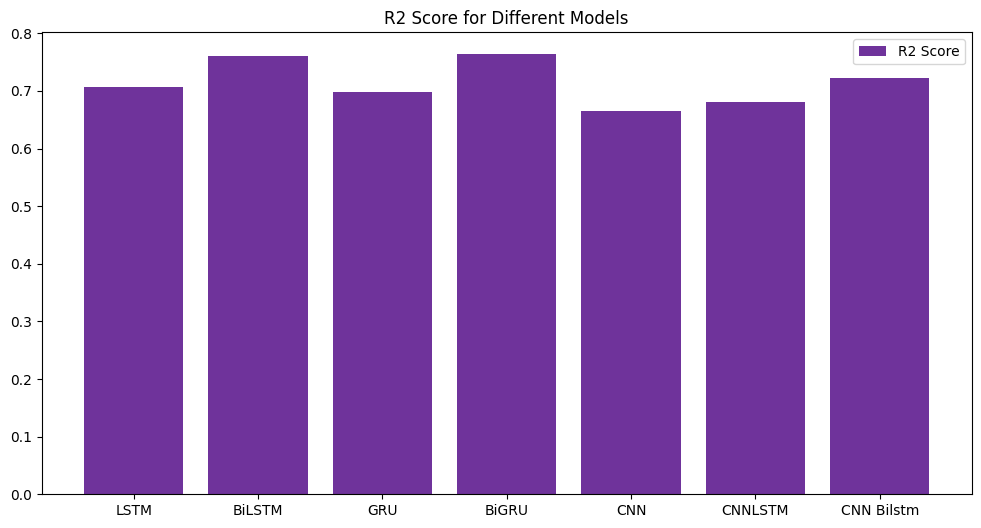

In [62]:
plt.figure(figsize=(12, 6))
plt.bar(models, r2_values, alpha=0.8, label='R2 Score', color='indigo')
plt.title('R2 Score for Different Models')
plt.legend()
plt.show()

Print Metrics

In [63]:
print("LSTM MAE:", mae_lstm)
print("LSTM MSE:", rmse_lstm)
print("LSTM R2 Score:", r2_lstm)
print(end="\n")
print("BiLSTM MAE:", mae_bilstm)
print("BiLSTM MSE:", rmse_bilstm)
print("BiLSTM R2 Score:", r2_bilstm)
print(end="\n")
print("GRU MAE:", mae_gru)
print("GRU MSE:", rmse_gru)
print("GRU R2 Score:", r2_gru)
print(end="\n")
print("BiGRU MAE:", mae_bigru)
print("BiGRU MSE:", rmse_bigru)
print("BiGRU R2 Score:", r2_bigru)
print(end="\n")
print("CNN MAE:", mae_cnn)
print("CNN MSE:", rmse_cnn)
print("CNN R2 Score:", r2_cnn)
print(end="\n")
print("CNN LSTM MAE:", mae_cnn_lstm)
print("CNN LSTM MSE:", rmse_cnn_lstm)
print("CNN LSTM R2 Score:", r2_cnn_lstm)
print(end="\n")
print("CNN BiLSTM MAE:", mae_cnn_bilstm)
print("CNN BiLSTM MSE:", rmse_cnn_bilstm)
print("CNN BiLSTM R2 Score:", r2_cnn_bilstm)

LSTM MAE: 2.961388429005941
LSTM MSE: 4.175890867380783
LSTM R2 Score: 0.7075640822023739

BiLSTM MAE: 2.7400858479786696
BiLSTM MSE: 3.7757860972468653
BiLSTM R2 Score: 0.7609178248950619

GRU MAE: 3.0253442361102842
GRU MSE: 4.243208096536786
GRU R2 Score: 0.6980596915513347

BiGRU MAE: 2.7960121554087816
BiGRU MSE: 3.754566856013483
BiGRU R2 Score: 0.7635974720691461

CNN MAE: 3.1843968445692603
CNN MSE: 4.463025430488609
CNN R2 Score: 0.6659656300507879

CNN LSTM MAE: 3.125402979734467
CNN LSTM MSE: 4.367147781256276
CNN LSTM R2 Score: 0.6801633639526287

CNN BiLSTM MAE: 2.907781244293461
CNN BiLSTM MSE: 4.0709146520527995
CNN BiLSTM R2 Score: 0.7220821592333775


Plot predictions for each model

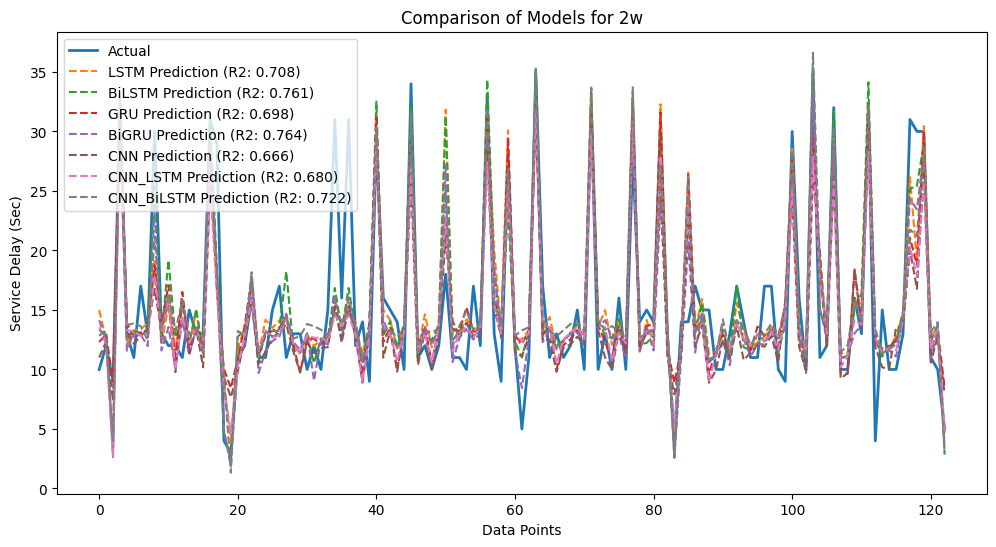

In [64]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', linewidth=2)
plt.plot(y_pred_lstm, label=f'LSTM Prediction (R2: {r2_lstm:.3f})', linestyle='dashed')
plt.plot(y_pred_bilstm, label=f'BiLSTM Prediction (R2: {r2_bilstm:.3f})', linestyle='dashed')
plt.plot(y_pred_gru, label=f'GRU Prediction (R2: {r2_gru:.3f})', linestyle='dashed')
plt.plot(y_pred_bigru, label=f'BiGRU Prediction (R2: {r2_bigru:.3f})', linestyle='dashed')
plt.plot(y_pred_cnn, label=f'CNN Prediction (R2: {r2_cnn:.3f})', linestyle='dashed')
plt.plot(y_pred_cnn_lstm, label=f'CNN_LSTM Prediction (R2: {r2_cnn_lstm:.3f})', linestyle='dashed')
plt.plot(y_pred_cnn_bilstm, label=f'CNN_BiLSTM Prediction (R2: {r2_cnn_bilstm:.3f})', linestyle='dashed')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec)')
plt.legend()
plt.title('Comparison of Models for 2w')
plt.show()

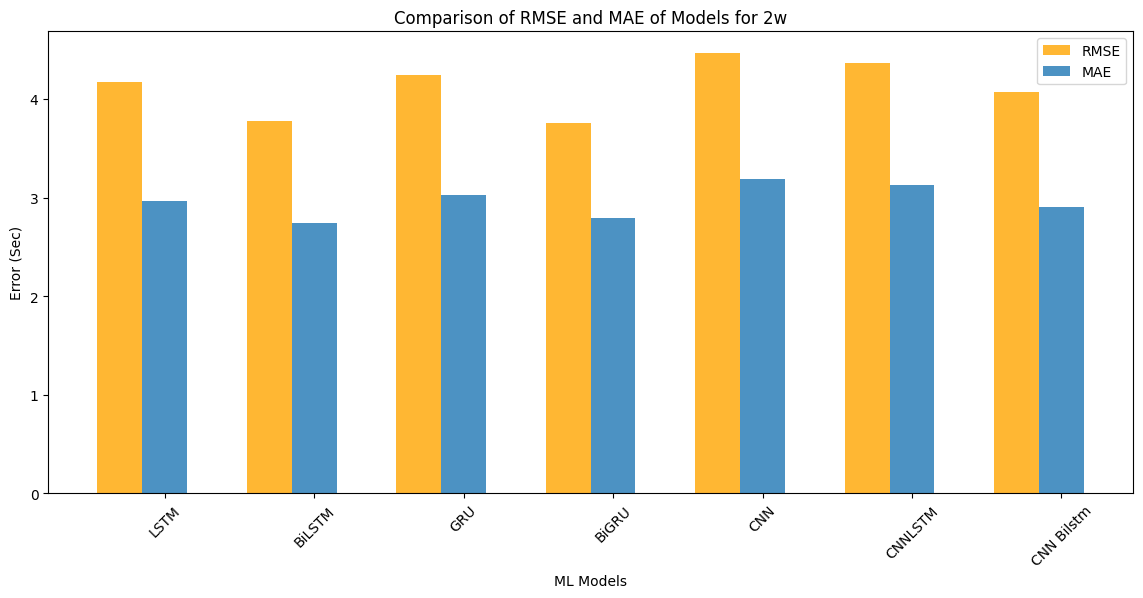

In [65]:
models = ['LSTM', 'BiLSTM', 'GRU', 'BiGRU', 'CNN', 'CNNLSTM', 'CNN Bilstm']
mae_values = [mae_lstm, mae_bilstm, mae_gru, mae_bigru, mae_cnn, mae_cnn_lstm, mae_cnn_bilstm]
mse_values = [rmse_lstm, rmse_bilstm, rmse_gru, rmse_bigru, rmse_cnn, rmse_cnn_lstm, rmse_cnn_bilstm]
r2_values = [r2_lstm, r2_bilstm, r2_gru, r2_bigru, r2_cnn, r2_cnn_lstm, r2_cnn_bilstm]

bar_width = 0.3
index = np.arange(len(models))

plt.figure(figsize=(14, 6))

# Plot MSE
plt.bar(index, mse_values, width=bar_width, alpha=0.8, label='RMSE', color='orange')

# Plot MAE
plt.bar(index + bar_width, mae_values, width=bar_width, alpha=0.8, label='MAE')

# Plot R2
#plt.bar(index + 2*bar_width, r2_values, width=bar_width, alpha=0.8, label='R2')

plt.xlabel('ML Models')
plt.ylabel('Error (Sec)')
plt.title('Comparison of RMSE and MAE of Models for 2w')
plt.xticks(index + bar_width, models, rotation=45)
plt.legend()

plt.show()